<a href="https://colab.research.google.com/github/alammobaDar/CCMACLRL_EXERCISES_COM231ML/blob/main/ML_Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [131]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

## B. Load and understand the dataset

Display the first 5 rows of the dataset using `.head()`

In [132]:
# put your answer here

df = pd.read_csv("/content/darren_dataset.csv")
df.head()

,Name,Posts/Share Frequently,Active?,Replies to comments/messages?,No. of friends/followers,Personality
0,Jonel,0,1,0,110,0
1,Octa,0,1,0,996,0
2,Emil,1,1,1,3200,1
3,Renzel,0,0,0,352,0
4,Carter,0,0,0,102,0


Display the summary of all the features of the dataset using `.info()`

In [133]:
# put your answer here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Name                           104 non-null    object
 1   Posts/Share Frequently         104 non-null    int64 
 2   Active?                        104 non-null    int64 
 3   Replies to comments/messages?  104 non-null    int64 
 4   No. of friends/followers       104 non-null    int64 
 5   Personality                    104 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 5.0+ KB


Display the total number of samples from each label using `.value_counts()`

In [134]:
# put your answer here
df['Personality'].value_counts()

,count
Personality,
1,60
0,44


Use a histogram to display the number of followers for each samples
 - The x axis should be the number of followers/friends
 - The y axis should be the number of samples in the dataset

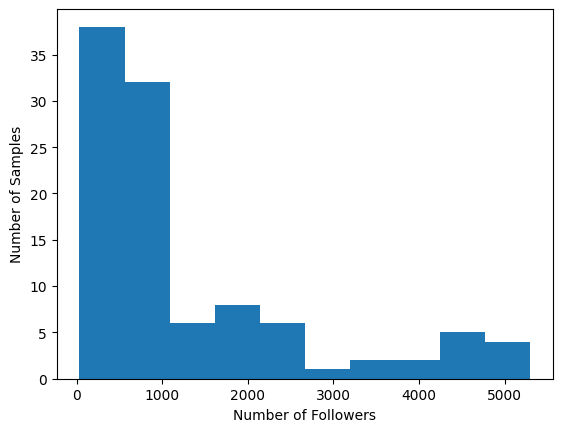

,Name,Posts/Share Frequently,Active?,Replies to comments/messages?,No. of friends/followers,Personality
0,Jonel,0,1,0,110,0
1,Octa,0,1,0,996,0
2,Emil,1,1,1,3200,1
3,Renzel,0,0,0,352,0
4,Carter,0,0,0,102,0


In [135]:
# put your answer here

plt.hist(df["No. of friends/followers"])
plt.xlabel("Number of Followers")
plt.ylabel("Number of Samples")
plt.show()

df.head()

Remove the name column using `drop()` method

In [136]:
# put your answer here
df = df.drop("Name", axis=1)
df.head()


,Posts/Share Frequently,Active?,Replies to comments/messages?,No. of friends/followers,Personality
0,0,1,0,110,0
1,0,1,0,996,0
2,1,1,1,3200,1
3,0,0,0,352,0
4,0,0,0,102,0


## C. Split the dataset into training and test set

Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [137]:
# put your answer here
X = df.drop(columns=['Personality']).values
X

array([[   0,    1,    0,  110],
       [   0,    1,    0,  996],
       [   1,    1,    1, 3200],
       [   0,    0,    0,  352],
       [   0,    0,    0,  102],
       [   1,    1,    1, 1900],
       [   1,    1,    1, 1300],
       [   1,    1,    1, 4900],
       [   0,    1,    0,  239],
       [   0,    0,    0,  430],
       [   1,    1,    1, 4900],
       [   1,    1,    1, 2000],
       [   1,    1,    1, 2500],
       [   1,    1,    1, 2600],
       [   1,    1,    1, 1000],
       [   1,    1,    1, 3300],
       [   0,    1,    0,  250],
       [   1,    1,    1, 1500],
       [   1,    1,    1, 4700],
       [   0,    0,    0,  109],
       [   1,    1,    1, 4100],
       [   0,    0,    1,  436],
       [   1,    1,    1, 2400],
       [   1,    1,    1, 4000],
       [   1,    1,    1, 4300],
       [   1,    1,    1, 4700],
       [   0,    0,    0,  372],
       [   1,    1,    1, 1800],
       [   0,    0,    0,  584],
       [   1,    1,    1, 5300],
       [  

Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [138]:
# put your answer here
y = df['Personality'].values
y

array([0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1])

Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [139]:
# put your answer here
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=3)

Display the dimensions of each variables using `.shape()`

In [140]:
# put your answer here
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(83, 4)
(21, 4)
(83,)
(21,)


## D. Create the model

Use KNN as a classifier by using `KNeighborsClassifier()`

In [141]:
# put your answer here
knn = KNeighborsClassifier(n_neighbors=10)

Train the model using the `.fit()`

In [142]:
# put your answer here
knn.fit(Xtrain, ytrain)

KNeighborsClassifier(n_neighbors=10)

Test the model using the `.predict()`

In [143]:
# put your answer here
ypred = knn.predict(Xtest)

## E. Evaluate the model

Create a confusion matrix

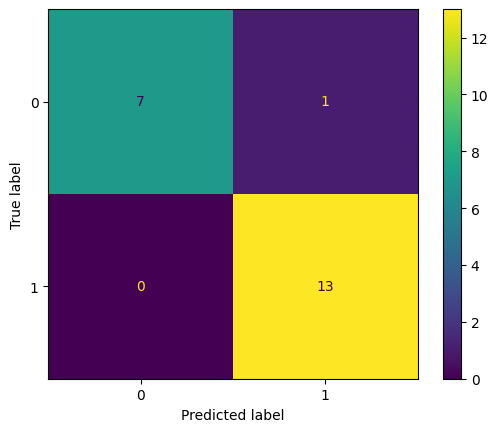

In [144]:
# put your answer here
conf_matrix = confusion_matrix(ytest, ypred, labels=knn.classes_)
conf_matrix

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=knn.classes_)
disp.plot()

Display the accuracy

In [145]:
# put your answer here
metrics.accuracy_score(ytest, ypred)

0.9523809523809523

Display the precision

In [146]:
# put your answer here
precision = precision_score(ytest, ypred, average=None)
precision

array([1.        , 0.92857143])

Display the recall

In [147]:
# put your answer here
recall = recall_score(ytest, ypred, average=None)
recall

array([0.875, 1.   ])

Display the f1-score

In [148]:
# put your answer here

f1 = f1_score(ytest, ypred, average=None)
f1

array([0.93333333, 0.96296296])

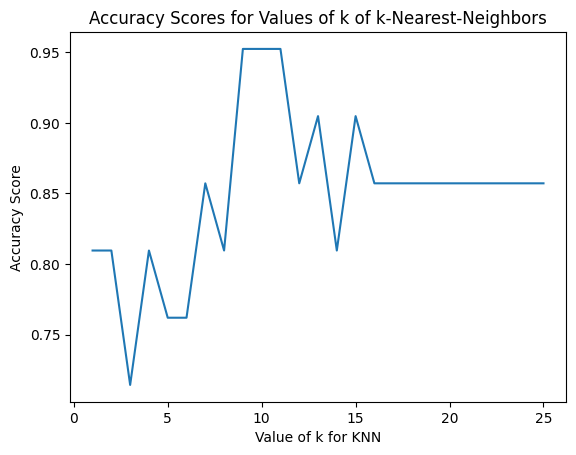

In [149]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []

for k in k_range:

    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn.fit(Xtrain, ytrain)

    # Test the model
    y_pred = knn.predict(Xtest)
    scores.append(metrics.accuracy_score(ytest, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()


## F. Predict your own personality

Enter your own features and use the model to generate a prediction using `.predict()`

In [150]:
# put your answer here
knn.predict([[0, 0, 0, 871]])


array([1])